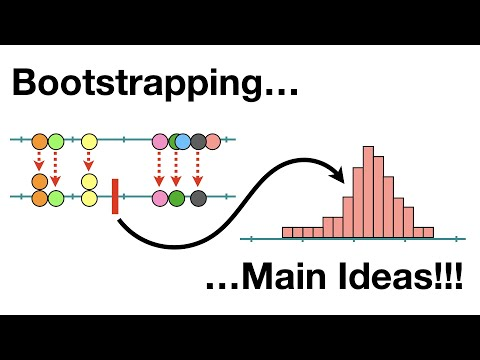

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

# Question 1: Standard Error vs Standard Deviation

- From what I researched I think the difference between standard error and standard deviation is that standard deviation is used for the sampled data, measuring the variability of data points and the amount of variation about its mean. However, standard error is an inferential statistics meaning it does not just use the sample data but makes estimates on how accurate the standard deviation or distribution is represented in comparison to the population. When the video mentioned standard error of the mean it meant how closely the sample mean was to the population mean.



## Chat Summary

- Standard Error (SE): The standard error is an inferential statistic that measures how much a sample statistic (like the sample mean) is expected to vary from the true population parameter (like the population mean). It allows us to make inferences about the population based on sample data.

- Estimation: The SE uses sample data to estimate the population mean, indicating the reliability and precision of the sample mean in approximating the population mean.

- Standard Error of the Mean (SEM): The SEM specifically measures how closely the sample mean deviates from the population mean. A smaller SEM suggests that the sample mean is likely closer to the population mean, while a larger SEM indicates more variability.
 
- In practice, the population mean is often unknown, so we use sample means to estimate it.

- This summary encapsulates our discussion on standard error, its role in statistical inference, and how the population mean is calculated.

https://chatgpt.com/share/66f99c84-c928-800f-b8ff-2463819d9fc3

# Question 2: Describing SEM to Create a 95% Confidence Interval


1. The first step is to calculate the sample mean from your sample data. Then you can use the standard deviation formula, which is the square root of the sum of all the squared distances from each sample point to the mean, divided by the number of data points in the sample. This will give us the standard deviation.
<br> 

2. You then calculate the Standard Error of the Mean(SEM) by dividing the standard deviation by the square root of the sample size to account for the way the sample size impacts the variability of the mean.
<br>
3. After this, you determine your critical value, which dictates the upper and lower bounds of a 95% confidence interval. The critical value is affected by the sample size (through the degrees of freedom) and the confidence level; a higher confidence level accounts for more uncertainty. If the sample size is less than 30 (n < 30), we use the t-distribution. If it's greater than 30 (n > 30), we use the z-distribution.
<br>
4. Next, we calculate the margin of error by multiplying the critical value by the standard error of the mean (SEM).
<br>
5. Finally, we create the interval by subtracting the margin of error (ME) from the sample mean and adding the margin of error to the sample mean. This interval provides us with 95% confidence.


## Chat Summary

### Homework Summary: Creating a 95% Confidence Interval Using SEM
#### Objective: To understand how to create a 95% confidence interval using the Standard Error of the Mean (SEM).


1. __Calculate the Sample Mean:__
- Gather your sample data and find the average value.


2. __Calculate the Sample Standard Deviation:__
- Measure how much the individual data points differ from the sample mean.


3. __Calculate the Standard Error of the Mean (SEM):__
- Divide the sample standard deviation by the square root of the sample size. This gives you an idea of how much the sample mean is expected to vary from the true population mean.


4. __Determine the Critical Value:__
- Based on your desired confidence level (like 95%) and the type of statistical distribution you're using (normal or t-distribution), find the corresponding critical value from statistical tables.


5. __Calculate the Margin of Error:__
- Multiply the critical value by the SEM. This margin of error will tell you how far from the sample mean you can go while still being confident that the population mean lies within that range.


6. __Construct the Confidence Interval:__
- Create the confidence interval by taking the sample mean and adding and subtracting the margin of error.

### Key Concepts Discussed:

- __Critical Value:__ This is a threshold that helps determine the boundaries for making decisions based on sample data. It varies depending on the confidence level and the statistical distribution used.

- __Sample Mean:__ The average of your sample data, which serves as an estimate for the population mean.

- __Degrees of Freedom:__ This relates to your sample size and is usually calculated as the sample size minus one.

### Contributions:

- __User:__ Requested clear and practical steps for creating a confidence interval, along with definitions of key terms.

- __Assistant:__ Provided detailed explanations of each step in the process and the significance of key concepts.

This process allows us to quantify the uncertainty in our estimate of the population mean based on sample data.

https://chatgpt.com/share/66f9a3d8-6044-800f-b710-ab6acd0dcb04

# Question 3: Calculating Confidence Interval with Bootstrapping

As stated in the video, you can use bootstrapping to find an interval that covers 95% of the bootstrapped means, which will represent the 95% confidence interval we are looking for. When using np.quantile(), we would input 0.025 and 0.975. This means that when we input 0.025, it will give us the bootstrapped mean below which 2.5% of the mean estimates fall, indicating that 95% of the mean estimates are greater than this value. This suggests we are 95% confident that the true value of the population mean is greater than the np.quantile(0.025) value. Conversely, when we calculate the np.quantile(0.975) value, we find that 95% of the bootstrapped mean estimates are below this, while 2.5% of the estimates are greater. Therefore, we are 95% confident that the true population mean is lower than this value.

# Question 4: 

In [1]:
import numpy as np

# Function to calculate bootstrap confidence interval for the population mean
def bootstrap_ci_mean(data, alpha=0.05, n_bootstraps=1000):

"""
First, we have the headline code defining the function, followed by the three parameters. "Data" is defined 
at the bottom of the code as sample_data = np.random.normal(loc=50, scale=10, size=100), which generates 
100 samples from a normal distribution. We have alpha, which represents the significance or confidence level. 
If alpha is 0.05, it means the confidence interval aimed for is 95%, since 1 − 𝛼 = 0.95 which is alpha.
The variable n_bootstraps represents the number of times the bootstrapping samples will be generated.
    
"""
    
    n = len(data)  # Takes account of how many data points are inside the sample.
    print(f"Sample size: {n}")  # Just used to reiterate the number of data points are in the sample.

    
    
    bootstraps = np.random.choice(data, (n_bootstraps, n), replace=True)
"""
The code above is the same as in the video, where it randomly selects data points from the original dataset n amount
of times, with n being the number of data points in the dataset. The line above allows for duplicates, as indicated 
by replace=True, and it randomly chooses data points using .random.choice. It will then output n_bootstraps 
arrays, which is 1000 based on the above code, each containing a unique combination of the original sample data.
"""
    print(f"Bootstrap samples generated: {bootstraps.shape}")  # Printing out the rows and columns of the bootstraps

    
    
    
    means = np.mean(bootstraps, axis=1)# this will calculate mean(.mean) of every array(1000) that was produced
    print(f"Means of bootstrap samples (first 5): {means[:5]}")  # Will give first 5 means of the first 5 arrays

    lower_bound = np.percentile(means, 100 * (alpha / 2))  # Lower bound
"""
In this code, utilizing alpha, which is the significance level, it calculates the percentiles of those means. 
Specifically, in the code above, the 2.5% percentile represents the lower bound. This is similar to np.quantile(), 
which returns the mean where 2.5% of the values are lower than this value and 95% of the means are above it. 
The same principle applies to the code below, where the upper bound is calculated; thus, the value returned is 
the mean where 95% of the values are lower, and 2.5% of the values are greater.
"""
    upper_bound = np.percentile(means, 100 * (1 - alpha / 2))  # Upper bound

    return lower_bound, upper_bound # returns the mean which is the lower_bound and the upper_bound


np.random.seed(42)  # Sets the seed so the same thing can be replicated

sample_data = np.random.normal(loc=50, scale=10, size=100)  
# The code above is the actual data sample where loc is is mean and scale is standard deviation with 100 data points.

print("Sample data generated.")  # Indicating that sample data is created

# Calculate the 95% confidence interval for the population mean
mean_ci = bootstrap_ci_mean(sample_data)
print(f"95% Confidence Interval for the Mean based on Sample Data: {mean_ci}")

Sample data generated.
Sample size: 100
Bootstrap samples generated: (1000, 100)
Means of bootstrap samples (first 5): [48.88660717 48.72053516 48.42534363 48.79683588 47.69467533]
95% Confidence Interval for the Mean based on Sample Data: (47.276635751407504, 50.62851486440195)


## Changes for fitting other Paremeters

### Steps to change Parameters(Median):

1. I'd first change the headline to fit the name more to median rather than mean.
2. I'd switch any mean calculation and replace it with .median for the means reassignment so that it will calculate the median of every array in the bootstraps variable.
3. This code remains the same because the process of bootstrapping is the same process across all types of statistics as stated in the video it's just the calculation involving the statistic itself is required to be changed.

### Chat Summaries

1. __Bootstrap Confidence Interval Code:__ We developed a Python function to calculate the 95% bootstrap confidence interval for a population mean based on sample data. The function utilizes the NumPy library for array manipulation and random sampling.
<br>

2. __Code Explanation:__
- __Function Definition:__ The function bootstrap_ci_mean accepts parameters for sample data, significance level (alpha), and the number of bootstrap samples.
- __Sample Size:__ The function calculates the number of observations in the input data.
- __Bootstrap Sampling:__ Using np.random.choice, the function generates multiple bootstrap samples from the original dataset. The parameter replace=True allows for duplicate selections.
- __Mean Calculation:__ It computes the mean for each bootstrap sample and stores the results in an array.
- __Confidence Interval Bounds:__ The lower and upper bounds of the confidence interval are determined using percentiles of the calculated means.
- __Sample Data Generation:__ The code includes generating a sample dataset using a normal distribution for demonstration purposes.

3. __Using np.random.seed:__

- The function np.random.seed() is used to set the seed for NumPy's random number generator, ensuring reproducibility of the random numbers generated. This allows for consistent results across multiple runs of the code.
- __Expected Output:__ When the complete code is executed, it outputs the sample data size, the shape of the generated bootstrap samples, the first five means of the bootstrap samples, and the final 95% confidence interval for the population mean.

This summary covers the key aspects of the code and its functionality, focusing on the bootstrap confidence interval and the use of random sampling in Python.

https://chatgpt.com/share/66f9ba0c-2ae4-800f-98e6-e7710498282a

# Question 5

The reason why we need to distinguish between the role of a population parameter and a sample stastic is because a population parameter represents the true value of a given parameter while sample statistic makes an approximation based off the subset of the population. The sample statistic may not always accurately represent the population parameter that's why we use confidnece intervals to help quantify the uncertainty. Confidence intervals gives a range of values where depending on the percentage the population parameter lies within that interval.


__Chat Summary on Confidence Intervals:__

In discussing confidence intervals, it's crucial to distinguish between population parameters and sample statistics. The population parameter represents the true value of a characteristic across the entire population, while the sample statistic is derived from a subset of that population. Different samples can yield different sample statistics due to sampling variability, which is why we use confidence intervals to estimate the population parameter. Confidence intervals provide a range within which we expect the true population parameter to lie, reflecting the uncertainty inherent in using a sample to make inferences about a population.

https://chatgpt.com/share/66fdff3a-7c98-800f-9b92-20819795f3a6

# Question 6

## What is Bootstrapping?
- Bootstrapping is a process where you create a sampling distribution by taking a sample and then randomly resampling from it. The number of times you resample depends on the size of the original sample. For example, if there are 8 data points, you randomly resample 8 times, meaning the size of the bootstrapped dataset matches the size of the original sample. This is done with replacement, meaning a specific data point can be sampled and resampled multiple times in the same dataset. Once the resampling is done, you've created a bootstrapped dataset. The number of bootstrapped datasets you create is up to you, and is usually in the thousands. After that, you calculate a specific parameter for each bootstrapped dataset and visualize them, often with a histogram. 


## What is the purpose of Bootstrapping?
- The purpose of bootstrapping is to allow you to derive a distribution using only a small sample. Bootstrapping also helps in assessing uncertainties; by creating multiple bootstrapped samples and calculating a specified parameter, such as the mean or median, we can observe how these estimates change across the simulated sets. Finally, as mentioned earlier, bootstrapping can be used to obtain a confidence interval, which provides insight into where the population parameter might hypothetically lie.


## If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
- First, I would obtain the sample and determine the sample size. Then, I would bootstrap that sample a sufficient number of times, such as 1,000 or more, to generate multiple bootstrap samples. After that, I would calculate the mean for each bootstrapped sample. This would give me a bootstrapped distribution, which I can visualize as a histogram, with each mean from the bootstrap samples represented. Finally, I would calculate a confidence interval for this distribution. If the hypothesized guess for the population average falls within this confidence interval, it suggests that the guess is plausible. If it falls outside the interval, then the hypothesized guess is not a reasonable estimate of the population average.

# Question 7

## Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero?
- This is because the confidence interval overlapping zero means the range of possible values the population average could be includes zero thus rejects the null hypothesis meaning there is a possibility the drug on average does nothing. We do not have enough evidence to confidently say on average the drug can't have an effect.


## Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"?
- If the confidence interval does not overlap with zero and the confidence interval is large enought then we can reject the null hypothesis as the chances the population average is 0 is very low and miniscule.

# Question 8

## DataSet

PatientID,Age,Gender,InitialHealthScore,FinalHealthScore<br>
1,45,M,84,86<br>
2,34,F,78,86<br>
3,29,M,83,80<br>
4,52,F,81,86<br>
5,37,M,81,84<br>
6,41,F,80,86<br>
7,33,M,79,86<br>
8,48,F,85,82<br>
9,26,M,76,83<br>
10,39,F,83,84<br>

# Introduction

The main problem with this assignment is that we have a dataset and need to figure out if the vaccine is effective. When we say “not effective,” we mean the null hypothesis, which states that, on average, the vaccine has no impact on patients. To explore this, we'll look at the InitialHealthScore and FinalHealthScore for each patient, specifically focusing on the difference between these two values. We’ll calculate this difference by subtracting the InitialHealthScore from the FinalHealthScore. This will help us see if there’s been any change in health scores due to the vaccine.

We can see the code visualize the health score differences below.

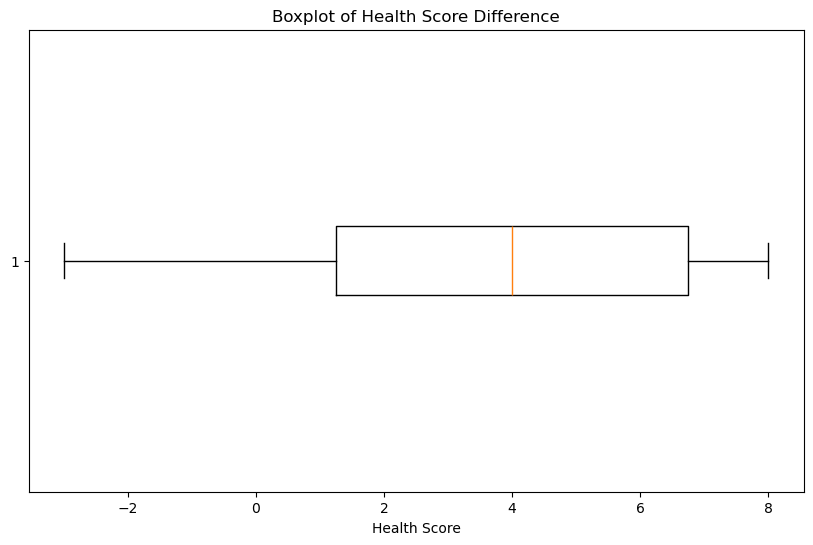

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


data = {
    'Health Score Difference': [2, 8, -3, 5, 3, 6, 7, -3, 7, 1]
}

df = pd.DataFrame(data)
"""
The code above was me manually calculating the score difference of all the patients and then placing them into an 
array. Then the pd.DataFrame() converts the array into a dataframe so that I could use it for visualizing the data.




The code below just establishes the size of the boxplot then utilizes the .boxplot() to create a boxplot using
the data I created above. The vert=False just shows the 
"""

plt.figure(figsize=(10, 6))
plt.boxplot(df['Health Score Difference'], vert = False)
plt.xlabel('Health Score')
plt.title('Boxplot of Health Score Difference')
fig.show()

# Boxplot Explanation

As you can see from the box plot above we can gather some information about this single sample of Health Score Differences. First, we can see the lower quartile is around 1 maybe 1.2, then the upper quartile is close to around 7. The median is somewhere approximately at 4 and then the minimum is negative 1 and the maximum is 8.


From there we can use Bootstrapping to create a bootstrapping histogram then a confidence interval to see if we can reject the null hypothesis("The vaccine on average has no effect on the patients")

Number of bootstrapped means: 1000
First 5 bootstrapped means: [2.4 2.4 3.1 4.1 4.4]
95% Confidence Interval: (0.70, 5.50)


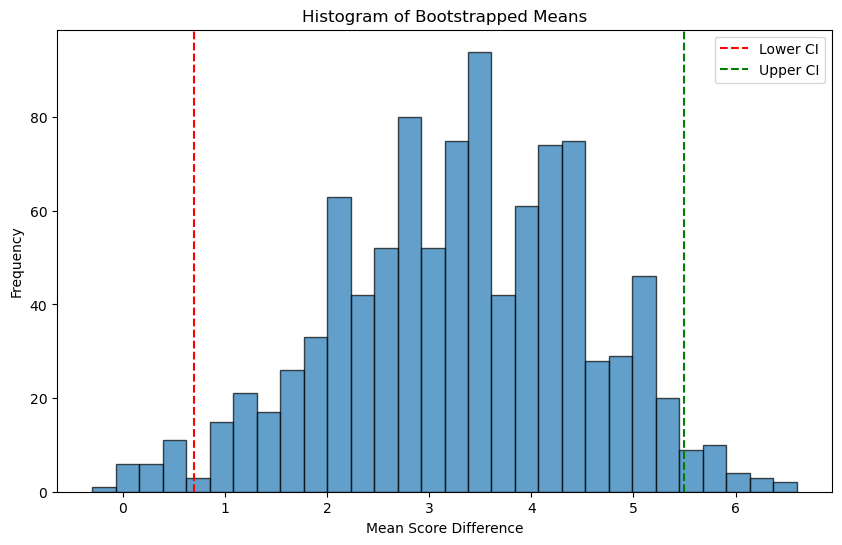

In [46]:
import numpy as np
import matplotlib.pyplot as plt

health_difference = [2, 8, -3, 5, 3, 6, 7, -3, 7, 1]  # used from before as the sample from which we bootstrap from.

def medicine_effect_mean(ds: list[int], alpha=0.05, n_bootstraps=1000):
    # ds using the array I made then alpha for the confidence interval later and then 1000 for the amount of bootstrap datasets  
    
    n = len(ds)  # to calculate the size of the original data set
    
    bootstraps = np.random.choice(ds, (n_bootstraps, n), replace=True)
    """
    Utilizing the code earlier in the homework I am essentially initializing the bootstrapping process by randomly
    choosing from the original dataset (.random.choice) 1000 times, each bootstrap dataset is the size of n which is 
    equivalent to the size of the original sample. The replace = True allows for independent events where even if 
    I choose a data point from the sample I can still choose it again.
    """
    
    means = np.mean(bootstraps, axis=1)
    """
    Using numpy's mean method I am calculating the mean of every bootstrap set
    """
    
    lower_bound = np.percentile(means, 100 * (alpha / 2))
    """
    The code above calculates the lower bound of the confidence interval by finding the value at the 2.5th 
    percentile of the bootstrapped means
    """
    
    upper_bound = np.percentile(means, 100 * (1 - alpha / 2))
    """
    The code above calculates the upper bound of the confidence interval by finding the value at the 97.5th 
    percentile of the bootstrapped means
    """
    
    return lower_bound, upper_bound, means


np.random.seed(42)  # for replicability so it's the same randomness
lower_ci, upper_ci, bootstrapped_means = medicine_effect_mean(health_difference)

# Check the size and some values of bootstrapped_means
print(f"Number of bootstrapped means: {len(bootstrapped_means)}")
print(f"First 5 bootstrapped means: {bootstrapped_means[:5]}")

# Print the confidence intervals
print(f"95% Confidence Interval: ({lower_ci:.2f}, {upper_ci:.2f})")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the histogram of bootstrapped means with 30 bins or intervals, edge color black and trasparency 0.7
ax.hist(bootstrapped_means, bins=30, edgecolor='k', alpha=0.7)
ax.axvline(x=lower_ci, color='red', linestyle='--', label='Lower CI')
#This is for the left dashed line showing the lower bound confidence interval

ax.axvline(x=upper_ci, color='green', linestyle='--', label='Upper CI')
#This is the stylistic features of the right dashed line for the upper bound confidence interval

# Adding titles and labels
ax.set_title('Histogram of Bootstrapped Means')
ax.set_xlabel('Mean Score Difference')
ax.set_ylabel('Frequency')
ax.legend()

# Show the figure
fig.show()

# Quantitative Analysis
in the code, I explained the bootstrapping process. Just to clarify, I took the sample of the health score differences and bootstrapped it 1,000 times, resampling with replacement. This resulted in 1,000 arrays with different bootstrapped datasets, from which I calculated the mean of each set. I then created a histogram (with a little help from ChatGPT) that shows the bootstrap distribution, along with the 95% confidence interval indicated between the red dashed line and the green dashed line.

# Findings and Discussions
In conclusion, the calculated 95% confidence interval for the mean scores is (0.70, 5.50). This allows us to reject the null hypothesis because the confidence interval does not overlap with 0. As explained in question 7, the probability of the population average not being within this interval is very small. Therefore, we can conclude that the vaccine does have an effect, specifically a positive effect on patients on average.

We could increase the number of bootstrapped sets to achieve an even more accurate representation of the confidence interval. Additionally, bootstrapping provides significant value in this context, especially when the sample size is relatively small and we want to deduce a distribution.

# ChatGPT Summary

__Bootstrapping and Confidence Intervals:__

1. Luca shared a Python code snippet for calculating bootstrapped confidence intervals using a sample dataset of health differences.
2. The code utilized the numpy library for bootstrapping and calculating means, and matplotlib for visualizing the results in a histogram.

__Indentation Issues:__

1. Luca encountered an indentation error in the code, specifically with the line that calculates the means of the bootstrapped samples.
2. The code was provided with corrected indentation while retaining all original comments.

__Matplotlib Edge Color:__

1. Luca inquired about the edgecolor='k' parameter in the histogram plot.
2. It was explained that 'k' stands for "black," which specifies the color of the edges of the histogram bars.

__Impact of Bootstrapped Sets on Confidence Interval Accuracy:__
1. It was confirmed that increasing the number of bootstrapped sets generally enhances the accuracy and reliability of the confidence interval.
2. More bootstraps provide better representation of data variability, smoother distributions, and reduced random error.

https://chatgpt.com/share/66fe277a-7cc4-800f-a7e2-b084b8a553b9